In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants as cte
from scipy import stats

In [ ]:
def ordenar(dados):
  dados["tensão"] = np.sort(dados["tensão"])
  dados["corrente"] = np.sort(dados["corrente"])
  return dados

T_1483 = pd.read_csv("T_1483.csv")
T_1395 = pd.read_csv("T_1395.csv")
T_1600 = pd.read_csv("T_1600.csv")
T_1700 = pd.read_csv("T_1700.csv")
T_1750 = pd.read_csv("T_1750.csv")
T_1805 = pd.read_csv("T_1805.csv")

T_1483.columns=["tensão", "corrente"]
T_1395.columns=["tensão", "corrente"]
T_1600.columns=["tensão", "corrente"]
T_1700.columns=["tensão", "corrente"]
T_1750.columns=["tensão", "corrente"]
T_1805.columns=["tensão", "corrente"]


T_1700 = ordenar(T_1700)
T_1805 = ordenar(T_1805)
T_1750 = ordenar(T_1750)
T_1600 = ordenar(T_1600)
T_1483 = ordenar(T_1483)
T_1395 = ordenar(T_1395)


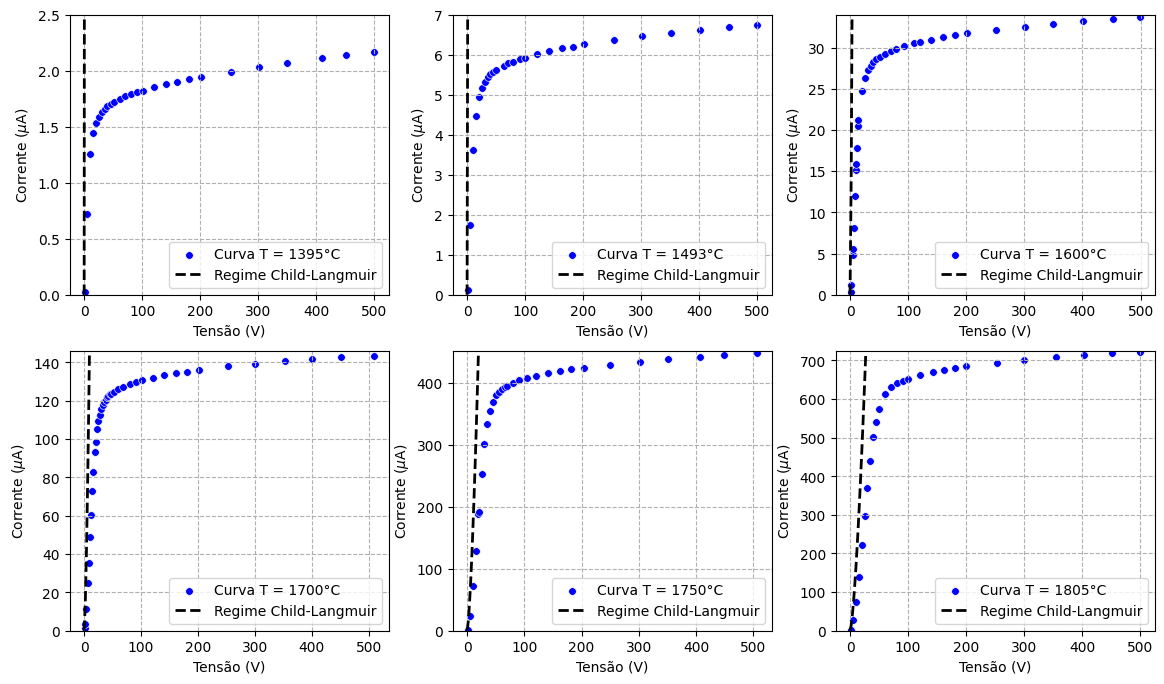

In [ ]:
# Gráfico do Regime Child

def I_child(dados):
  func_child = []
  e_0 = cte.epsilon_0
  e = cte.e
  m = cte.electron_mass
  e_m = e/m
  d = 0.018
  r = 0.015
  A_c = cte.pi * r ** 2
  const = (4*e_0/9)*(2*e_m)**(1/2)
  for i in dados:
    tensao = i
    func_child.append(const* A_c * (tensao**(3/2)/ d**2)*10**6)
  return func_child

x = np.arange(0, 150, 2)
j_1395 = I_child(x)
j_1483 = I_child(x)
j_1600 = I_child(x)
j_1700 = I_child(x)
j_1750 = I_child(x)
j_1805 = I_child(x)

figure, axs = plt.subplots(2,3, figsize=(14,8))
sns.scatterplot(x=T_1395["tensão"], y=T_1395["corrente"], s=30, c="blue", ax=axs[0,0], label="Curva T = 1395°C")
axs[0,0].plot(x, j_1395, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[0,0].set_xlabel("Tensão (V)")
axs[0,0].set_ylabel(r"Corrente ($\mu$A)")
axs[0,0].grid(True, linestyle="--")
axs[0,0].legend(loc="lower right", fontsize=10)
axs[0,0].set_ylim((0, 2.5))
sns.scatterplot(x=T_1483["tensão"], y=T_1483["corrente"], s=30, c="blue", ax=axs[0,1], label="Curva T = 1493°C")
axs[0,1].plot(x, j_1483, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[0,1].set_ylim((0, 7))
axs[0,1].set_xlabel("Tensão (V)")
axs[0,1].set_ylabel(r"Corrente ($\mu$A)")
axs[0,1].grid(True, linestyle="--")
axs[0,1].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1600["tensão"], y=T_1600["corrente"], s=30, c="blue", ax=axs[0,2], label="Curva T = 1600°C")
axs[0,2].plot(x, j_1600, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[0,2].set_ylim((0, 34))
axs[0,2].set_xlabel("Tensão (V)")
axs[0,2].set_ylabel(r"Corrente ($\mu$A)")
axs[0,2].grid(True, linestyle="--")
axs[0,2].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1700["tensão"], y=T_1700["corrente"], s=30, c="blue", ax=axs[1,0], label="Curva T = 1700°C")
axs[1,0].plot(x, j_1700, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[1,0].set_ylim((0, 146))
axs[1,0].set_xlabel("Tensão (V)")
axs[1,0].set_ylabel(r"Corrente ($\mu$A)")
axs[1,0].grid(True, linestyle="--")
axs[1,0].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1750["tensão"], y=T_1750["corrente"], s=30, c="blue", ax=axs[1,1], label="Curva T = 1750°C")
axs[1,1].plot(x, j_1750, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[1,1].set_ylim((0, 452))
axs[1,1].set_xlabel("Tensão (V)")
axs[1,1].set_ylabel(r"Corrente ($\mu$A)")
axs[1,1].grid(True, linestyle="--")
axs[1,1].legend(loc="lower right", fontsize=10)
sns.scatterplot(x=T_1805["tensão"], y=T_1805["corrente"], s=30, c="blue", ax=axs[1,2], label="Curva T = 1805°C")
axs[1,2].plot(x, j_1805, c="black", linestyle="--", linewidth=2, label="Regime Child-Langmuir")
axs[1,2].set_ylim((0, 725))
axs[1,2].set_xlabel("Tensão (V)")
axs[1,2].set_ylabel(r"Corrente ($\mu$A)")
axs[1,2].legend(loc="lower right", fontsize=10)
axs[1,2].grid(True, linestyle="--")
plt.show()

In [ ]:
# Tomando o logaritmo dos dados
T_1395_log = np.log(T_1395)

T_1483_log = np.log(T_1483)

T_1600_log = np.log(T_1600)

T_1700_log = np.log(T_1700)

T_1750_log = np.log(T_1750)

T_1805_log = np.log(T_1805)

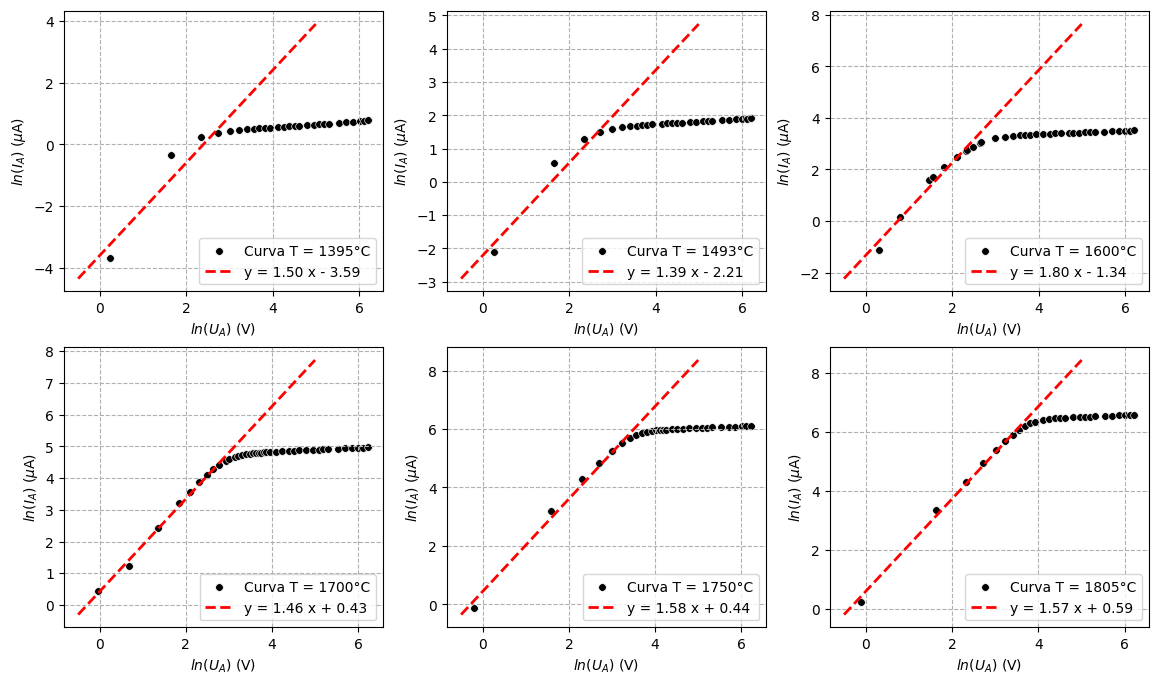

In [ ]:
# Gráfico do Regime Child

slope1, intercept1, _, _, _ = stats.linregress(T_1395_log["tensão"].iloc[0:5], T_1395_log["corrente"].iloc[0:5])
slope2, intercept2, _, _, _ = stats.linregress(T_1483_log["tensão"].iloc[0:5], T_1483_log["corrente"].iloc[0:5])
slope3, intercept3, _, _, _ = stats.linregress(T_1600_log["tensão"].iloc[0:9], T_1600_log["corrente"].iloc[0:9])
slope4, intercept4, _, _, _ = stats.linregress(T_1700_log["tensão"].iloc[0:10], T_1700_log["corrente"].iloc[0:10])
slope5, intercept5, _, _, _ = stats.linregress(T_1750_log["tensão"].iloc[0:9], T_1750_log["corrente"].iloc[0:9])
slope6, intercept6, _, _, _ = stats.linregress(T_1805_log["tensão"].iloc[0:9], T_1805_log["corrente"].iloc[0:9])

x = np.arange(-0.5,5,0.001)

figure, axs = plt.subplots(2,3, figsize=(14,8))
sns.scatterplot(x=T_1395_log["tensão"], y=T_1395_log["corrente"], s=30, c="k", ax=axs[0,0], label="Curva T = 1395°C")
axs[0,0].plot(x, slope1 * x + intercept1, c="red", linestyle="--", linewidth=2, label=f"y = {slope1:.2f} x - {abs(intercept1):.2f}")
axs[0,0].set_xlabel("$ln(U_A)$ (V)")
axs[0,0].set_ylabel(r"$ln(I_A)$ ($\mu$A)")
axs[0,0].grid(True, linestyle="--")
axs[0,0].legend(loc="lower right", fontsize=10)

sns.scatterplot(x=T_1483_log["tensão"], y=T_1483_log["corrente"], s=30, c="k", ax=axs[0,1], label="Curva T = 1493°C")
axs[0,1].plot(x, slope2 * x + intercept2, c="red", linestyle="--", linewidth=2, label=f"y = {slope2:.2f} x - {abs(intercept2):.2f}")
axs[0,1].set_xlabel("$ln(U_A)$ (V)")
axs[0,1].set_ylabel(r"$ln(I_A)$ ($\mu$A)")
axs[0,1].grid(True, linestyle="--")
axs[0,1].legend(loc="lower right", fontsize=10)

sns.scatterplot(x=T_1600_log["tensão"], y=T_1600_log["corrente"], s=30, c="k", ax=axs[0,2], label="Curva T = 1600°C")
axs[0,2].plot(x, slope3 * x + intercept3, c="red", linestyle="--", linewidth=2, label=f"y = {slope3:.2f} x - {abs(intercept3):.2f}")
axs[0,2].set_xlabel("$ln(U_A)$ (V)")
axs[0,2].set_ylabel(r"$ln(I_A)$ ($\mu$A)")
axs[0,2].grid(True, linestyle="--")
axs[0,2].legend(loc="lower right", fontsize=10)

sns.scatterplot(x=T_1700_log["tensão"], y=T_1700_log["corrente"], s=30, c="k", ax=axs[1,0], label="Curva T = 1700°C")
axs[1,0].plot(x, slope4 * x + intercept4, c="red", linestyle="--", linewidth=2, label=f"y = {slope4:.2f} x + {intercept4:.2f}")
axs[1,0].set_xlabel("$ln(U_A)$ (V)")
axs[1,0].set_ylabel(r"$ln(I_A)$ ($\mu$A)")
axs[1,0].grid(True, linestyle="--")
axs[1,0].legend(loc="lower right", fontsize=10)

sns.scatterplot(x=T_1750_log["tensão"], y=T_1750_log["corrente"], s=30, c="k", ax=axs[1,1], label="Curva T = 1750°C")
axs[1,1].plot(x, slope5 * x + intercept5, c="red", linestyle="--", linewidth=2, label=f"y = {slope5:.2f} x + {intercept5:.2f}")
axs[1,1].set_xlabel("$ln(U_A)$ (V)")
axs[1,1].set_ylabel(r"$ln(I_A)$ ($\mu$A)")
axs[1,1].grid(True, linestyle="--")
axs[1,1].legend(loc="lower right", fontsize=10)

sns.scatterplot(x=T_1805_log["tensão"], y=T_1805_log["corrente"], s=30, c="k", ax=axs[1,2], label="Curva T = 1805°C")
axs[1,2].plot(x, slope6 * x + intercept6, c="red", linestyle="--", linewidth=2, label=f"y = {slope6:.2f} x + {intercept6:.2f}")
axs[1,2].set_xlabel("$ln(U_A)$ (V)")
axs[1,2].set_ylabel(r"$ln(I_A)$ ($\mu$A)")
axs[1,2].legend(loc="lower right", fontsize=10)
axs[1,2].grid(True, linestyle="--")
plt.show()

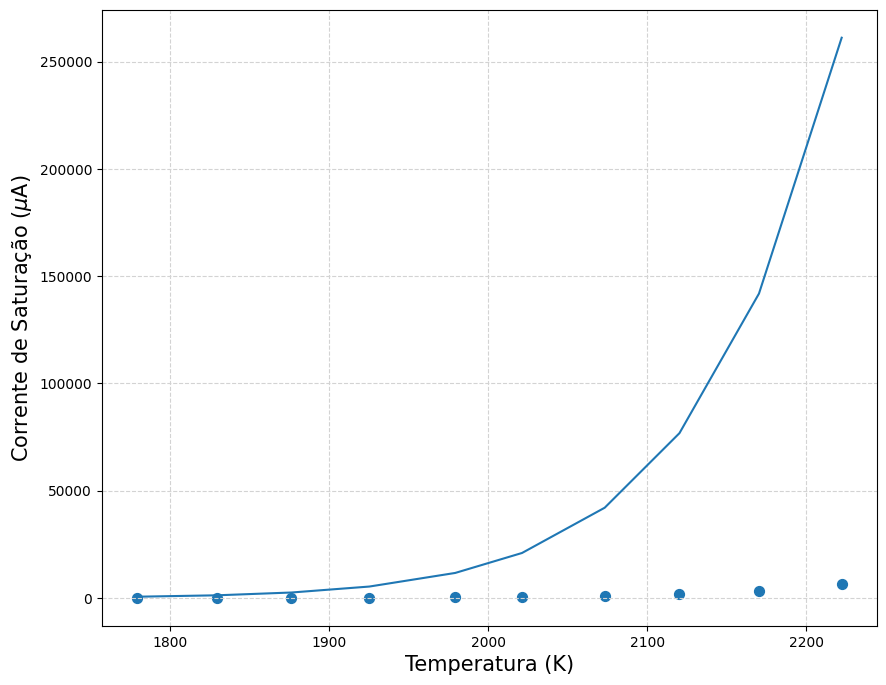

In [ ]:
RRD = pd.read_csv("RRD_2.csv")

#Transformar temperatura em Kelvin
T_K =[]
for index, row in RRD.iterrows():
  T_K.append(row["T (°C)"]+273.15)

RRD["T (K)"] = T_K

#função para calcular o regime de richard - D
def I_richard(dados):
  func_rich = []
  e = cte.e
  m = cte.electron_mass
  h = cte.h
  pi = cte.pi
  k_b = cte.k
  w = 4.5 * e
  r = 0.015
  A_c = pi * r ** 2
  A_0 = ((e*m*4*pi*(k_b**2))/h**3)
  for i in dados:
    func_rich.append((A_c * A_0*(i)**2)*np.exp(-w/(k_b*(i)))* 10**6)
  return func_rich

j_richard = I_richard(RRD["T (K)"])

plt.figure(figsize=(10,8))
plt.scatter(y=RRD["I (micro A)"], x=RRD["T (K)"], s=50)
plt.plot(RRD["T (K)"], j_richard)
plt.xlabel("Temperatura (K)", fontsize=15)
plt.ylabel(r"Corrente de Saturação ($\mu$A)",fontsize=15)
plt.grid(True, linestyle="--", c="lightgray")
plt.show()


Função Trabalho (eV) 4.503013224848474


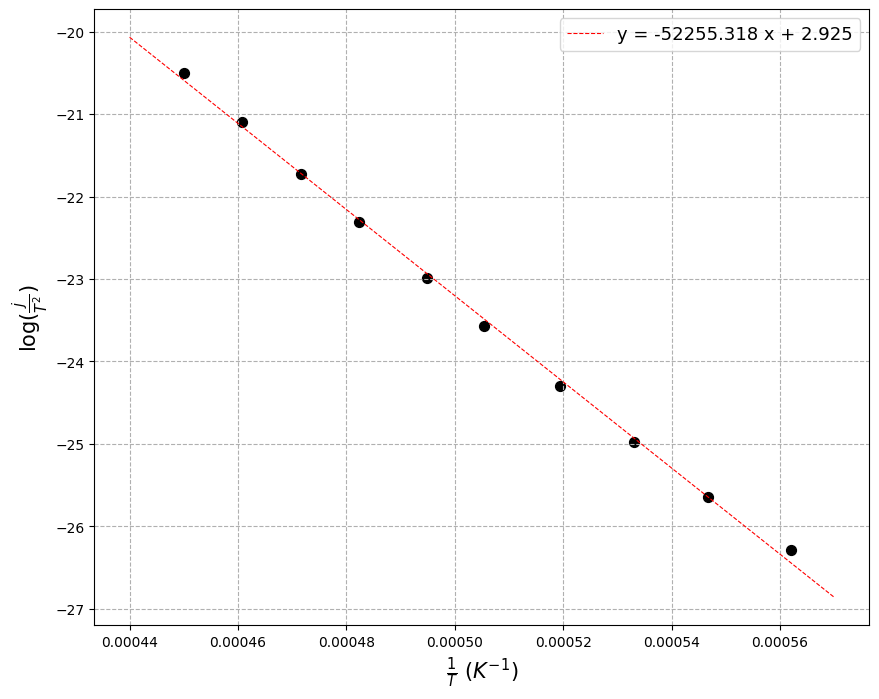

In [ ]:
#Importação dos dados
RRD = pd.read_csv("RRD_2.csv")

#Transformar temperatura em Kelvin
T_K =[]
for index, row in RRD.iterrows():
  T_K.append(row["T (°C)"]+273)
RRD["T (K)"] = T_K

#Listas para agregar as transformações da equação
j_por_T_sqr = []
inverso_T = []

#função para transformar os dados
for indew, row in RRD.iterrows():
  #Calcular a razão da corrente em Ampere para cada temperatura em Kelvin
  j_por_T_sqr.append(row["I (micro A)"]*10**-6/((row["T (K)"])**2))
  #Calcular o inverso da temperatura em Kelvin
  inverso_T.append(1/(row["T (K)"]))

#Calcular o log da razão
y_grafico = np.log(np.array(j_por_T_sqr))

# Realizar a regressão da reta obtida
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

model = ln.fit(np.array(inverso_T).reshape(-1,1), y_grafico)

x = np.arange(0.00044, 0.00058, 0.00001)
y = model.predict(np.array(x).reshape(-1,1))

#Obter a função trabalho por meio do coeficiente ângular*const. boltzmann em ev
kb_ev = 8.61733*10**-5
w = -model.coef_[0]*kb_ev
b = model.intercept_

print("Função Trabalho (eV)", w )

#Gráfico da reta de log(j/T²) x 1/T
plt.figure(figsize=(10,8))
plt.scatter(x=inverso_T, y=y_grafico, s=50, c="black")
plt.plot(x, y, linestyle="--", c="r", linewidth=0.8, label=f"y = {model.coef_[0]:.3f} x + {model.intercept_:.3f}")
plt.grid(True, linestyle="--")
plt.title("")
plt.xlabel(r"$\frac{1}{T}$ ($K^{-1}$)", fontsize=15)
plt.ylabel(r"log($\frac{j}{T^2}$)", fontsize=15)
plt.legend(fontsize=13, loc="upper right")
plt.show()

In [ ]:
e = cte.e
m = cte.electron_mass
h = cte.h
pi = cte.pi
k_b = cte.k
w = -model.coef_[0]*kb_ev * e
r = 0.015
A_c = pi * r ** 2
A_0 = ((e*m*4*pi*(k_b**2))/h**3)
alpha = k_b * (np.log(A_c * A_0) - b)


print(f"alpha = {alpha:.3e}")
#Em eV
print(f"alpha = {alpha/cte.e:.3e}")

alpha = 5.273e-23
alpha = 3.291e-04


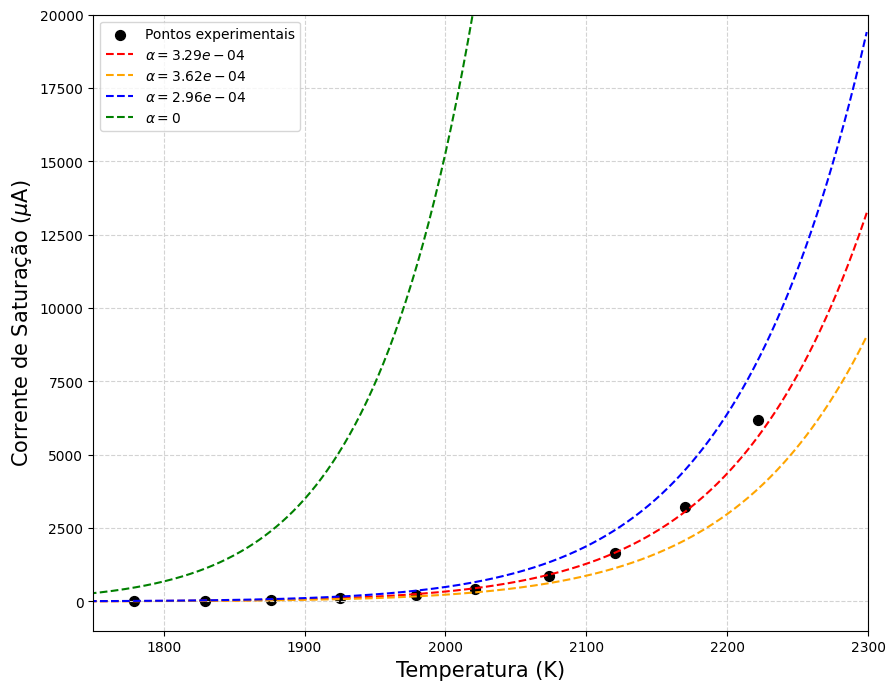

In [ ]:
RRD = pd.read_csv("RRD_2.csv")

#Transformar temperatura em Kelvin
T_K =[]
for index, row in RRD.iterrows():
  T_K.append(row["T (°C)"]+273.15)

RRD["T (K)"] = T_K

#função para calcular o regime de richard - D
def I_richard(dados,alpha):
  func_rich = []
  e = cte.e
  m = cte.electron_mass
  h = cte.h
  pi = cte.pi
  k_b = cte.k
  w = -model.coef_[0]*kb_ev * e
  r = 0.015
  A_c = pi * r ** 2
  A_0 = ((e*m*4*pi*(k_b**2))/h**3)
  for i in dados:
    func_rich.append((A_c * A_0* np.exp(- alpha/k_b) * (i)**2)*np.exp(-w/(k_b*(i)))* 10**6)
  return func_rich

x_T = np.arange(1700,2300,1)
j_richard = I_richard(x_T,alpha)
j_richard1 = I_richard(x_T,(alpha + 0.1 * alpha))
j_richard2 = I_richard(x_T,(alpha - 0.1 * alpha))
j_richard3 = I_richard(x_T,0)

plt.figure(figsize=(10,8))
plt.scatter(y=RRD["I (micro A)"], x=RRD["T (K)"], s=50, c='k', label='Pontos experimentais')
plt.plot(x_T, j_richard, c='r', linestyle='--',label=fr'$\alpha = {alpha/cte.e:.2e}$')
plt.plot(x_T, j_richard1, c='orange', linestyle='--',label=fr'$\alpha = {(alpha + 0.1 * alpha)/cte.e:.2e}$')
plt.plot(x_T, j_richard2, c='blue', linestyle='--',label=fr'$\alpha = {(alpha - 0.1 * alpha)/cte.e:.2e}$')
plt.plot(x_T, j_richard3, c='g', linestyle='--',label=fr'$\alpha = 0$')
plt.xlabel("Temperatura (K)", fontsize=15)
plt.ylabel(r"Corrente de Saturação ($\mu$A)",fontsize=15)
plt.xlim(1750,2300)
plt.ylim(-1000,20e3)
plt.grid(True, linestyle="--", c="lightgray")
plt.legend()
plt.show()


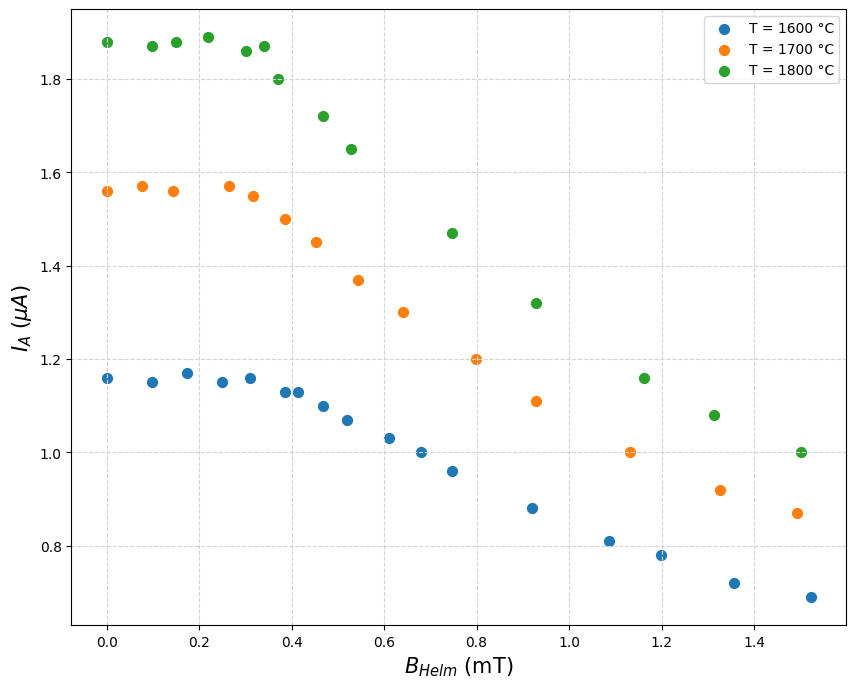

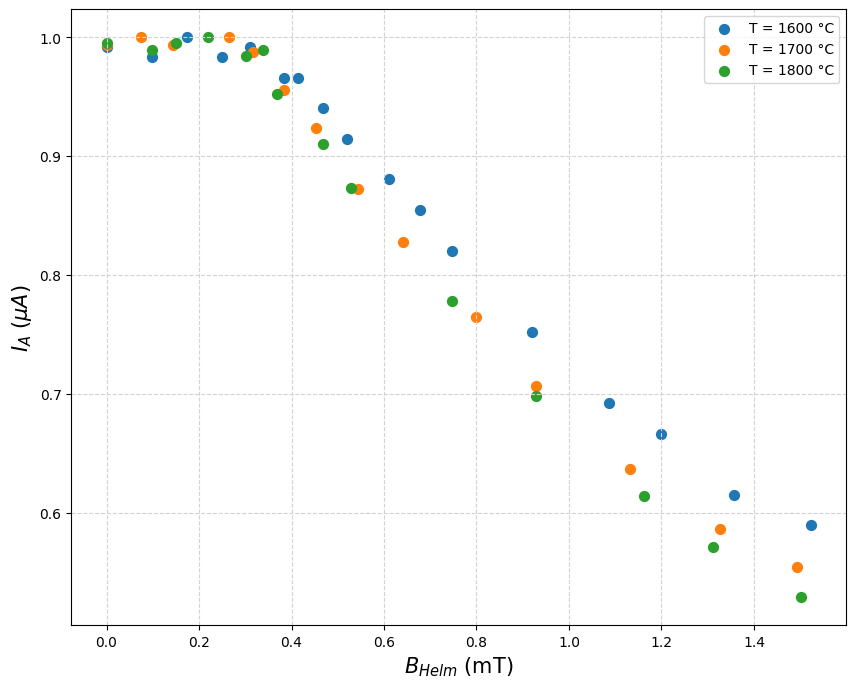

In [24]:
B_1600 = pd.read_csv("B_1600.csv")
B_1700 = pd.read_csv("B_1700.csv")
B_1800 = pd.read_csv("B_1800.csv")

B_1600.columns=["i_bob", "i_cat"]
B_1700.columns=["i_bob", "i_cat"]
B_1800.columns=["i_bob", "i_cat"]

def b_helm(dados):
  b = []
  mu_0 = cte.mu_0
  N = 130
  R = 0.155
  for i in dados:
    b.append(((8/5**1.5) * mu_0 * N * i / R) * 10 **3)
  return b

B_1600["b_helm"] = b_helm(B_1600["i_bob"])
B_1700["b_helm"] = b_helm(B_1700["i_bob"])
B_1800["b_helm"] = b_helm(B_1800["i_bob"])

plt.figure(figsize=(10,8))
plt.scatter(y=B_1600["i_cat"], x=B_1600["b_helm"], s=50, label = 'T = 1600 °C')
plt.scatter(y=B_1700["i_cat"], x=B_1700["b_helm"], s=50, label = 'T = 1700 °C')
plt.scatter(y=B_1800["i_cat"], x=B_1800["b_helm"], s=50, label = 'T = 1800 °C')
plt.xlabel(r"$B_{Helm}$ (mT)", fontsize=15)
plt.ylabel(r"$I_A$ ($\mu A$)",fontsize=15)
plt.grid(True, linestyle="--", c="lightgray")
plt.legend()
plt.show()


plt.figure(figsize=(10,8))
plt.scatter(y=B_1600["i_cat"]/ max(B_1600["i_cat"]), x=B_1600["b_helm"], s=50, label = 'T = 1600 °C')
plt.scatter(y=B_1700["i_cat"]/ max(B_1700["i_cat"]), x=B_1700["b_helm"], s=50, label = 'T = 1700 °C')
plt.scatter(y=B_1800["i_cat"]/ max(B_1800["i_cat"]), x=B_1800["b_helm"], s=50, label = 'T = 1800 °C')
plt.xlabel(r"$B_{Helm}$ (mT)", fontsize=15)
plt.ylabel(r"$I_A$ ($\mu A$)",fontsize=15)
plt.grid(True, linestyle="--", c="lightgray")
plt.legend()
plt.show()

The functions intersect at x = 0.3092318316733275 with temperature of 1600°C
The functions intersect at x = 0.2564161280907275 with temperature of 1700°C
The functions intersect at x = 0.2695552937122942 with temperature of 1800°C


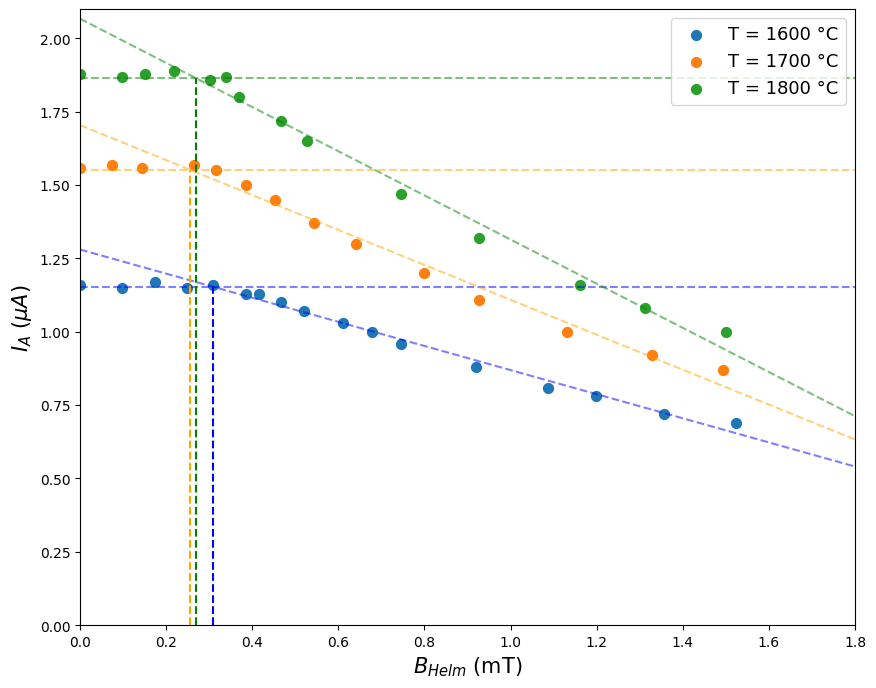

In [ ]:
from scipy.optimize import fsolve

mean1 = np.mean(B_1600["i_cat"].iloc[0:6])
mean2 = np.mean(B_1700["i_cat"].iloc[0:6])
mean3 = np.mean(B_1800["i_cat"].iloc[0:7])

slope1, intercept1, _, _, _ = stats.linregress(B_1600["b_helm"].iloc[6:17], B_1600["i_cat"].iloc[6:17])
slope2, intercept2, _, _, _ = stats.linregress(B_1700["b_helm"].iloc[4:14], B_1700["i_cat"].iloc[4:14])
slope3, intercept3, _, _, _ = stats.linregress(B_1800["b_helm"].iloc[5:14], B_1800["i_cat"].iloc[5:14])

def equation1(x):
  return slope1*x + intercept1 - mean1
def equation2(x):
  return slope2*x + intercept2 - mean2
def equation3(x):
  return slope3*x + intercept3 - mean3

x_b = np.arange(0,3.5,0.01)

x_intercept_1 = fsolve(equation1, 0)
x_intercept_2 = fsolve(equation2, 0)
x_intercept_3 = fsolve(equation3, 0)
print(f"The functions intersect at x = {x_intercept_1[0]} with temperature of 1600°C")
print(f"The functions intersect at x = {x_intercept_2[0]} with temperature of 1700°C")
print(f"The functions intersect at x = {x_intercept_3[0]} with temperature of 1800°C")

plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(y=B_1600["i_cat"], x=B_1600["b_helm"], s=50, label = 'T = 1600 °C')
plt.scatter(y=B_1700["i_cat"], x=B_1700["b_helm"], s=50, label = 'T = 1700 °C')
plt.scatter(y=B_1800["i_cat"], x=B_1800["b_helm"], s=50, label = 'T = 1800 °C')

plt.hlines(y=mean1, xmin=0, xmax=5, linestyle='--', color='blue', alpha=0.5)
plt.plot(x_b, slope1*x_b + intercept1, linestyle='--', color='blue', alpha=0.5)
plt.vlines(x=x_intercept_1[0], ymin=0, ymax=mean1, linestyle='--', color='blue')

plt.hlines(y=mean2, xmin=0, xmax=5, linestyle='--', color='orange', alpha=0.5)
plt.plot(x_b, slope2*x_b + intercept2, linestyle='--', color='orange', alpha=0.5)
plt.vlines(x=x_intercept_2[0], ymin=0, ymax=mean2, linestyle='--', color='orange')

plt.hlines(y=mean3, xmin=0, xmax=5, linestyle='--', color='green', alpha=0.5)
plt.plot(x_b, slope3*x_b + intercept3, linestyle='--', color='green', alpha=0.5)
plt.vlines(x=x_intercept_3[0], ymin=0, ymax=mean3, linestyle='--', color='green')

plt.xlabel(r"$B_{Helm}$ (mT)", fontsize=15)
plt.ylabel(r"$I_A$ ($\mu A$)",fontsize=15)
#plt.grid(True, linestyle="--", c="lightgray")
plt.xlim(0, 1.8)
plt.ylim(0, 2.1)
plt.legend(fontsize=13)
plt.show()

In [ ]:
#Cálculo da razão carga massa com os dados obtidos

v = [0.85, 0.75, 0.67]
b = [x_intercept_1[0], x_intercept_2[0], x_intercept_3[0]]

def carga_massa(b, v):
  e_m = []
  d = 1.8/100
  V = v
  B = b
  for i in range(3):
    e_m.append((2 * V[i] / (B[i]*(10**-3) * d)**2) / 10 **11 )
  return e_m

carga_massa = carga_massa(b,v)
real_value = (cte.e / cte.electron_mass) / 10**11

print(carga_massa)
print(f'Valor real:{real_value}')

for i in range(3):
  erro_relativo = (abs(carga_massa[i] - real_value) / real_value) * 100
  print(f'Erro relativo: {erro_relativo}')


[0.5487007140430222, 0.7041344175694181, 0.5691989073296337]
Valor real:1.758820010772163
Erro relativo: 68.80290702388984
Erro relativo: 59.96552158510598
Erro relativo: 67.63745557569918


In [ ]:
#Cálculo da razão carga massa com os dados obtidos COM MANIPULAÇÃO NA TENSÃO DE ACELERAÇÃO

v = [0.85, 0.75, 0.67]
b = [x_intercept_1[0], x_intercept_2[0], x_intercept_3[0]]

def carga_massa(b):
  e_m = []
  d = 1.8/100
  V = 8.2
  B = b
  for i in range(3):
    e_m.append((2 * V / (B[i]*(10**-3) * d)**2) / 10 **11 )
  return e_m

carga_massa = carga_massa(b)
real_value = (cte.e / cte.electron_mass) / 10**11

print(carga_massa)
print(f'Valor real:{real_value}')

for i in range(3):
  erro_relativo = (abs(carga_massa[i] - real_value) / real_value) * 100
  print(f'Erro relativo: {erro_relativo}')


[5.293348064885627, 7.698536298758969, 6.966314985228352]
Valor real:1.758820010772163
Erro relativo: 200.96019106365088
Erro relativo: 337.71029733617445
Erro relativo: 296.07890190935325


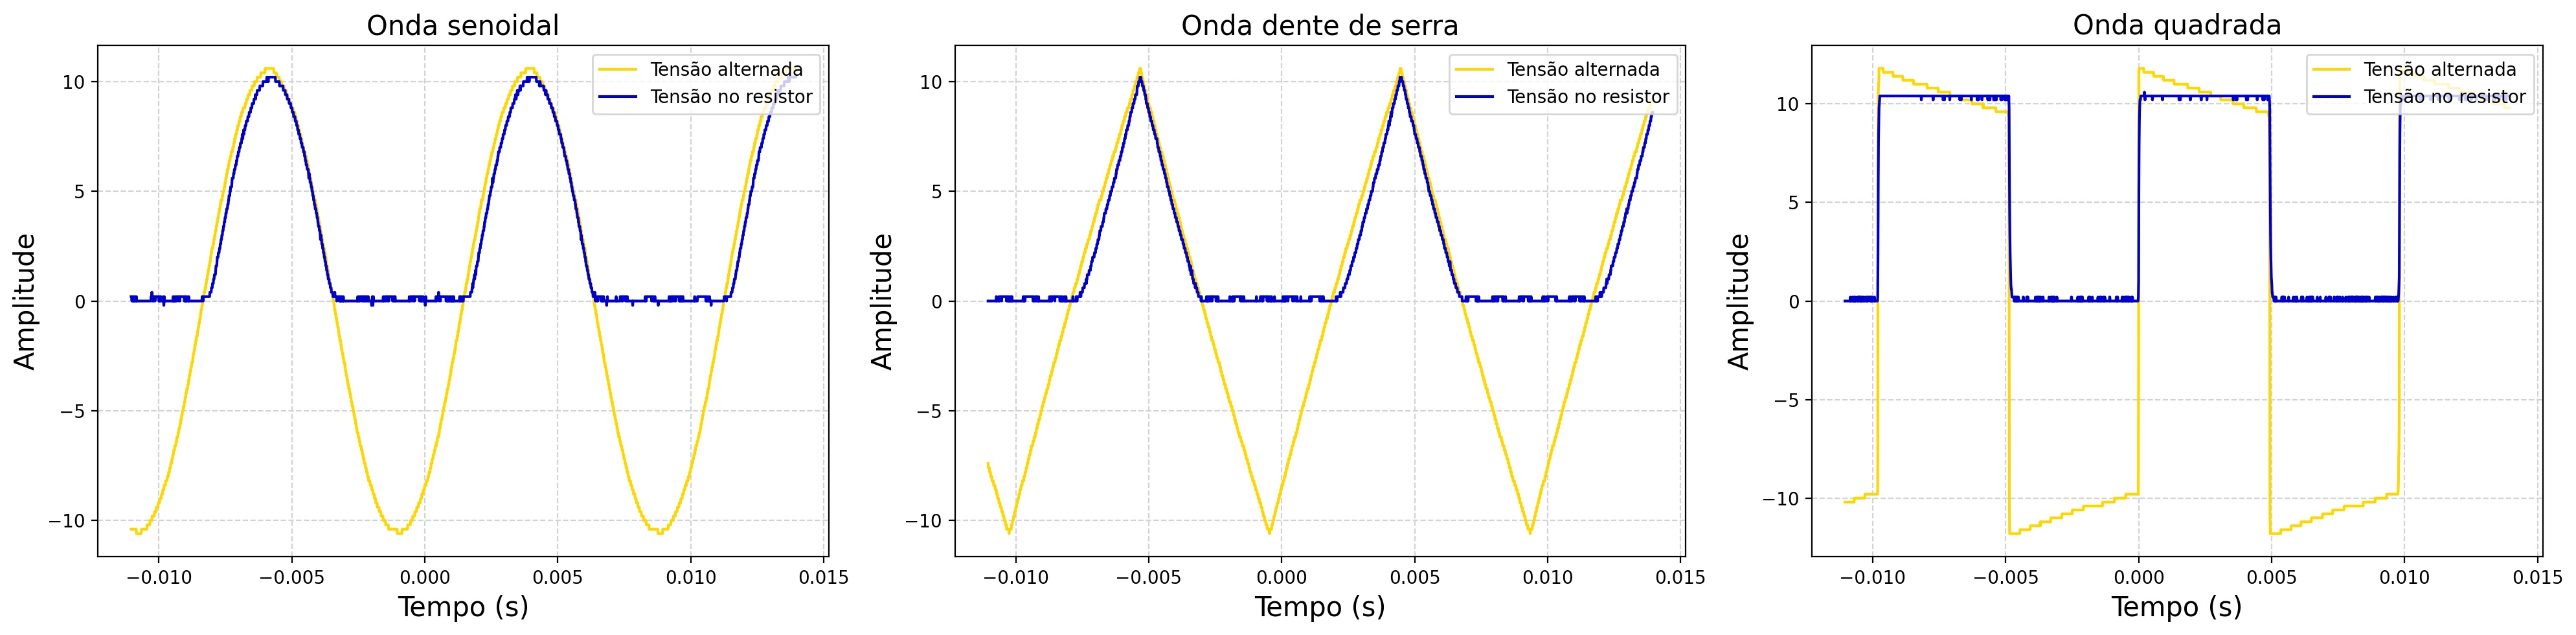

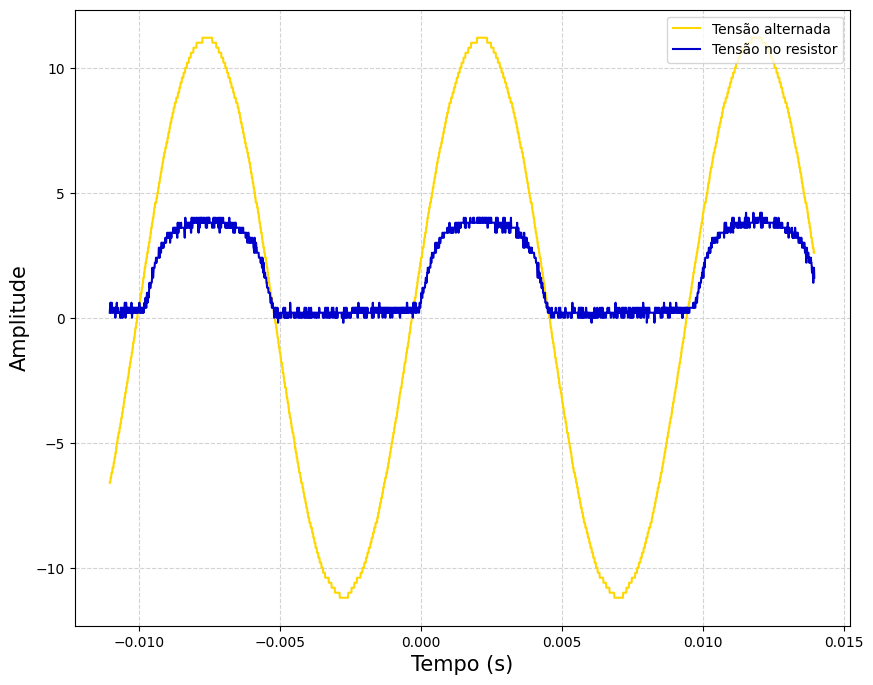

In [23]:
retificacao = pd.read_csv("retificacao.csv")

fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

axes[0].plot(retificacao["tempo"], retificacao["tensão_1"], c="gold", label='Tensão alternada')
axes[0].plot(retificacao["tempo"], 2.5*retificacao["corrente_1"], c="mediumblue", label='Tensão no resistor')
axes[0].set_xlabel("Tempo (s)", fontsize=15)
axes[0].set_ylabel(r"Amplitude",fontsize=15)
axes[0].set_title(r'Onda senoidal', fontsize=15)
axes[0].grid(True, linestyle="--", c="lightgray")
axes[0].legend(loc='upper right')

axes[1].plot(retificacao["tempo"], retificacao["tensão_2"], c="gold", label='Tensão alternada')
axes[1].plot(retificacao["tempo"], 2.5*retificacao["corrente_2"], c="mediumblue", label='Tensão no resistor')
axes[1].set_xlabel("Tempo (s)", fontsize=15)
axes[1].set_ylabel(r"Amplitude",fontsize=15)
axes[1].set_title(r'Onda dente de serra', fontsize=15)
axes[1].grid(True, linestyle="--", c="lightgray")
axes[1].legend(loc='upper right')

axes[2].plot(retificacao["tempo"], retificacao["tensão_3"], c="gold", label='Tensão alternada')
axes[2].plot(retificacao["tempo"], 2.5*retificacao["corrente_3"], c="mediumblue", label='Tensão no resistor')
axes[2].set_xlabel("Tempo (s)", fontsize=15)
axes[2].set_ylabel(r"Amplitude",fontsize=15)
axes[2].set_title(r'Onda quadrada', fontsize=15)
axes[2].grid(True, linestyle="--", c="lightgray")
axes[2].legend(loc='upper right')


plt.tight_layout()
plt.show()


plt.figure(figsize=(10,8), facecolor='white')
plt.plot(retificacao["tempo"], retificacao["tensão_4"], c="gold", label='Tensão alternada')
plt.plot(retificacao["tempo"], 10*retificacao["corrente_4"], c="mediumblue", label='Tensão no resistor')
plt.xlabel("Tempo (s)", fontsize=15)
plt.ylabel(r"Amplitude",fontsize=15)
plt.grid(True, linestyle="--", c="lightgray")
plt.legend(loc='upper right')
plt.show()

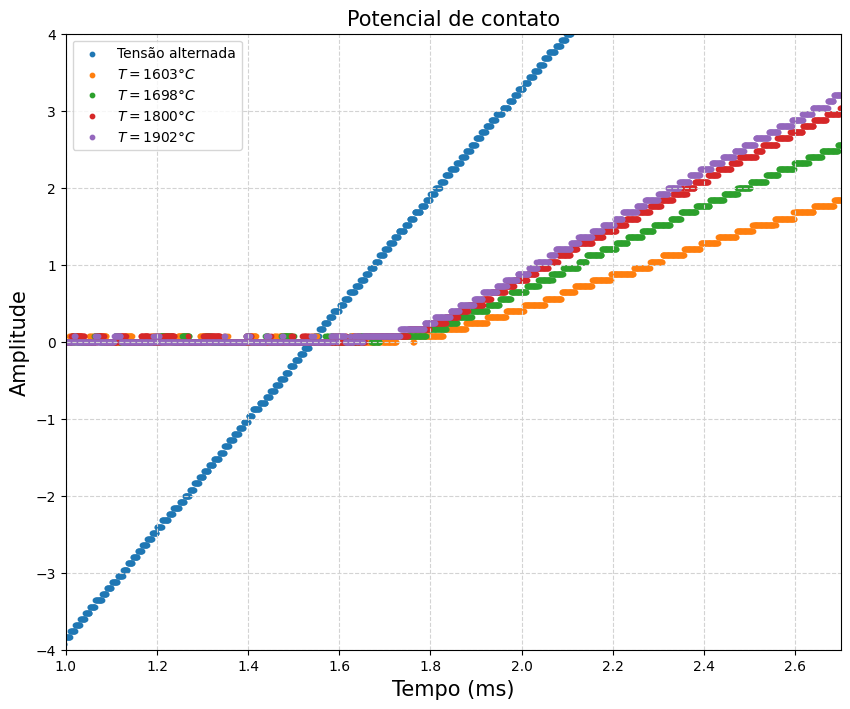

In [30]:
from scipy.ndimage import uniform_filter1d

potencial_contato = pd.read_csv("potencial_contato.csv")
potencial_contato["tempo"] = potencial_contato["tempo"]*10**3

plt.figure(figsize=(10,8), facecolor='white')
plt.scatter(potencial_contato["tempo"], potencial_contato["sinal_ac"], s=10, label='Tensão alternada')
plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1603"], s=10, label=r'$T=1603 °C $')
plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1698"], s=10, label=r'$T=1698 °C $')
plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1800"], s=10, label=r'$T=1800 °C $')
plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1902"], s=10, label=r'$T=1902 °C $')
plt.xlabel("Tempo (ms)", fontsize=15)
plt.ylabel(r"Amplitude",fontsize=15)
plt.title(r'Potencial de contato', fontsize=15)
plt.xlim(1,2.7)
plt.ylim(-4,4)
plt.grid(True, linestyle="--", c="lightgray")
plt.legend(loc='upper left')
plt.show()

<ipython-input-56-1d79b2689387>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_1 = np.arange(x_intercept_1,3.5,0.01)
<ipython-input-56-1d79b2689387>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_2 = np.arange(x_intercept_2,3.5,0.01)
<ipython-input-56-1d79b2689387>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_3 = np.arange(x_intercept_3,3.5,0.01)
<ipython-input-56-1d79b2689387>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scala

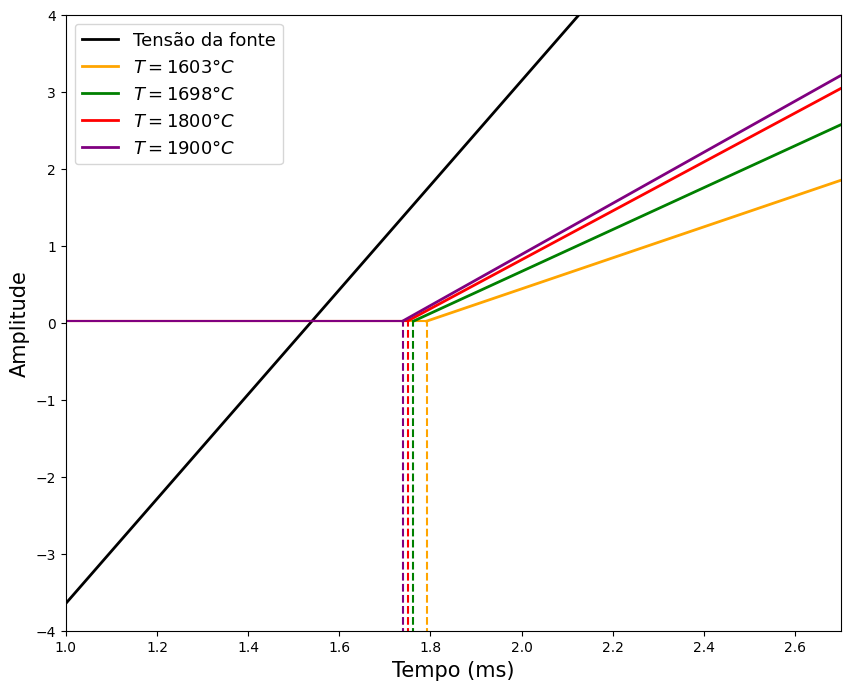

In [56]:
from scipy.optimize import fsolve

potencial_contato = pd.read_csv("potencial_contato.csv")
potencial_contato["tempo"] = potencial_contato["tempo"]*10**3

mean1 = np.mean(potencial_contato["corrente_1603"].iloc[0:1600])
mean2 = np.mean(potencial_contato["corrente_1698"].iloc[0:1600])
mean3 = np.mean(potencial_contato["corrente_1800"].iloc[0:1600])
mean4 = np.mean(potencial_contato["corrente_1902"].iloc[0:1600])


slope1, intercept1, _, _, _ = stats.linregress(potencial_contato["tempo"].iloc[1600:25001], potencial_contato["corrente_1603"].iloc[1600:2501])
slope2, intercept2, _, _, _ = stats.linregress(potencial_contato["tempo"].iloc[1600:25001], potencial_contato["corrente_1698"].iloc[1600:2501])
slope3, intercept3, _, _, _ = stats.linregress(potencial_contato["tempo"].iloc[1600:25001], potencial_contato["corrente_1800"].iloc[1600:2501])
slope4, intercept4, _, _, _ = stats.linregress(potencial_contato["tempo"].iloc[1600:25001], potencial_contato["corrente_1902"].iloc[1600:2501])
slope5, intercept5, _, _, _ = stats.linregress(potencial_contato["tempo"], potencial_contato["sinal_ac"])

def equation1(x):
  return slope1*x + intercept1 - mean1
def equation2(x):
  return slope2*x + intercept2 - mean2
def equation3(x):
  return slope3*x + intercept3 - mean3
def equation4(x):
  return slope4*x + intercept4 - mean4

x_intercept_1 = fsolve(equation1, 0)
x_intercept_2 = fsolve(equation2, 0)
x_intercept_3 = fsolve(equation3, 0)
x_intercept_4 = fsolve(equation4, 0)

x_1 = np.arange(x_intercept_1,3.5,0.01)
x_2 = np.arange(x_intercept_2,3.5,0.01)
x_3 = np.arange(x_intercept_3,3.5,0.01)
x_4 = np.arange(x_intercept_4,3.5,0.01)
x_5 = np.arange(1,3.5,0.01)

plt.figure(figsize=(10,8), facecolor='white')
#plt.scatter(potencial_contato["tempo"], potencial_contato["sinal_ac"], s=8, label='Tensão da fonte')
plt.plot(x_5, slope5*x_5 + intercept5, c='k', label='Tensão da fonte', linewidth=2)

#plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1603"], s=8, label=r'$T=1603 °C $')
plt.vlines(x=x_intercept_1, ymin=-5, ymax=mean1, linestyle='--', color='orange')
plt.hlines(y=mean1, xmin=0, xmax=x_intercept_1, linestyle='-', color='orange', alpha=1)
plt.plot(x_1, slope1*x_1 + intercept1, linestyle='-', color='orange', alpha=1, linewidth=2, label=r'$T=1603 °C $')

#plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1698"], s=8, label=r'$T=1698 °C $')
plt.vlines(x=x_intercept_2, ymin=-5, ymax=mean2, linestyle='--', color='green')
plt.hlines(y=mean2, xmin=0, xmax=x_intercept_2, linestyle='-', color='green', alpha=0, linewidth=2)
plt.plot(x_2, slope2*x_2 + intercept2, linestyle='-', color='green', alpha=1, linewidth=2, label=r'$T=1698 °C $')

#plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1800"], s=8, label=r'$T=1800 °C $')
plt.vlines(x=x_intercept_3, ymin=-5, ymax=mean3, linestyle='--', color='red')
plt.hlines(y=mean3, xmin=0, xmax=x_intercept_3, linestyle='-', color='red', alpha=1)
plt.plot(x_3, slope3*x_3 + intercept3, linestyle='-', color='red', alpha=1, linewidth=2, label=r'$T=1800 °C $')

#plt.scatter(potencial_contato["tempo"], potencial_contato["corrente_1902"], s=8, label=r'$T=1900 °C $')
plt.vlines(x=x_intercept_4, ymin=-5, ymax=mean4, linestyle='--', color='purple')
plt.hlines(y=mean4, xmin=0, xmax=x_intercept_4, linestyle='-', color='purple', alpha=1)
plt.plot(x_4, slope4*x_4 + intercept4, linestyle='-', color='purple', alpha=1, linewidth=2, label=r'$T=1900 °C $')

plt.xlabel("Tempo (ms)", fontsize=15)
plt.ylabel(r"Amplitude",fontsize=15)
plt.xlim(1,2.7)
plt.ylim(-4,4)
plt.legend(loc='upper left', fontsize=13)
#plt.grid(True, linestyle="--", c="lightgray")
plt.show()

In [26]:
print(x_intercept_1)
print(x_intercept_2)
print(x_intercept_3)
print(x_intercept_4)

[1.79162466]
[1.76263509]
[1.75135174]
[1.73904574]


In [28]:
print(slope1)
print(slope2)
print(slope3)
print(slope4)

2.0133924445174207
2.72112862690777
3.177123922375212
3.3188742208323707
